# Problem Set 3, due February 10 at 11:59am (i.e., noon).

###Before You Start

Make sure the following libraries load correctly (hit Ctrl-Enter). Note that while you are loading several powerful libraries, including machine learning libraries, the goal of this problem set is to implement several algorithms from scratch. In particular, you should *not* be using any built-in libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python! Parts 1 and 2 will be relatively easy; Part 3 will take more time.

*Also note:* For this assignment we are requiring you to use base **matplotlib** - no more Seaborn or other packages. This will help you become familiar with techniques for maintaining fine-grained control over your data visualizations. It will also help our graders, who spent countless hours trying to make various versions import for grading.

In [272]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series,DataFrame
import matplotlib
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).  Please read about the dataset carefully before continuing.  Use the following commands to load the dataset:


In [273]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [274]:
print (bdata.keys())
print (bdata.feature_names)
print (bdata.data.shape)
print (bdata.target.shape)
# uncomment the following if you want to see a lengthy description of the dataset
# print (bdata.DESCR)

dict_keys(['target', 'DESCR', 'feature_names', 'data'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)


In [275]:
# Creating pandas data Frame
BostonDF = DataFrame(bdata.data)

# Creating column names
BostonDF.columns = bdata.feature_names

# The target column will be price 
BostonDF['MEDV'] = bdata.target

---

##Part 1: Descriptive analysis

Before beginning the "real" work, dig into the data a bit do see what you're dealing with.  If you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning (for instance, [this one](https://github.com/jrjohansson/scientific-python-lectures)).

###1.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


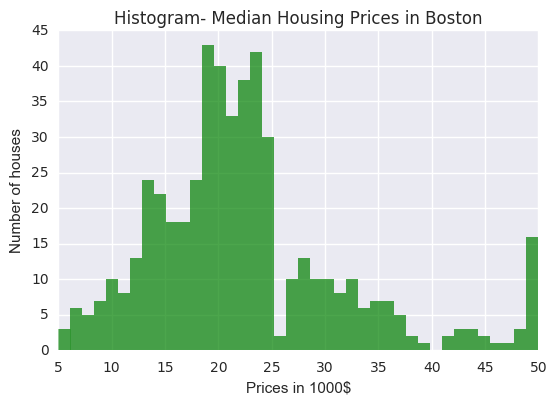

In [276]:
#Creating figure and setting axes
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

#Creating histogram
axes.hist(BostonDF['MEDV'],bins=40,color='green',edgecolor='none',alpha=0.7)

#Removing top and right axes
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.get_xaxis().tick_bottom()
axes.get_yaxis().tick_left()

#adding label
axes.set_xlabel('Prices in 1000$')
axes.set_ylabel('Number of houses')
axes.set_title('Histogram- Median Housing Prices in Boston')

###1.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


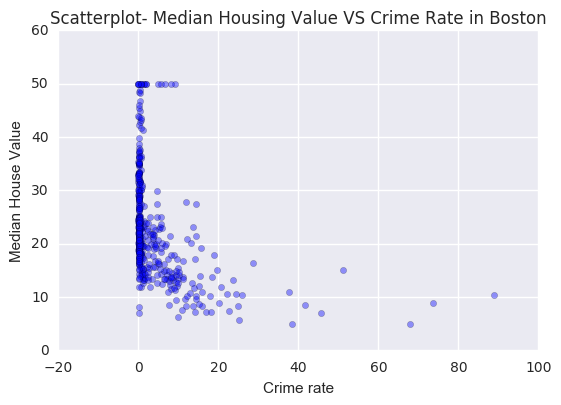

In [277]:
#Creating figure and setting axes
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.scatter(BostonDF['CRIM'],BostonDF['MEDV'],alpha=0.4)

#Removing top and right axes
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.get_xaxis().tick_bottom()
axes.get_yaxis().tick_left()

#adding label
axes.set_xlabel('Crime rate')
axes.set_ylabel('Median House Value')
axes.set_title('Scatterplot- Median Housing Value VS Crime Rate in Boston')

---

##Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

###2.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. Furthermore the details of RMSE can be found on [Wikipedia](http://en.wikipedia.org/wiki/Root-mean-square_deviation)



In [278]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print compute_rmse((2,2,3),(0,2,6)
2.16
"""
def compute_rmse(predictions, yvalues):
    if len(np.array(predictions)) == len(np.array(yvalues)):
        rmse = np.sqrt(np.mean((np.array(predictions) - np.array(yvalues))**2))
    else:
        print("unequal arrays")
        return -1
    return rmse

###2.2 Divide your data into training and testing datasets

Randomly select 66% of the data and put this in a training dataset (call this "bdata_train"), and place the remaining 34% in a testing dataset (call this "bdata_test")


In [279]:
# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=13579)

#dividing into test and train
bdata_train = BostonDF.sample(frac=0.66)
bdata_test = BostonDF.loc[~BostonDF.index.isin(bdata_train.index)]

# We need to reset the indexes of the training and test sets
bdata_test.index = range(0,len(bdata_test))
bdata_train.index = range(0,len(bdata_train))

###2.3 Use a very bad baseline for prediction, and compute RMSE

Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Compute the RMSE on the training set.  Now compute the RMSE on the test data set (but use the model you trained on the training set!).  How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?

In [280]:
def badModel(df):
    badModelDf=[]
    for i in range(0,len(df)):
        badModelDf.append(df["MEDV"].mean())
    
    return badModelDf

In [281]:
print('Train MSE::',compute_rmse(badModel(bdata_train),bdata_train.MEDV))

Train MSE:: 8.85972596946


*Enter your observations here*

In [282]:
print('Test MSE::',compute_rmse(badModel(bdata_test),bdata_test.MEDV))

Test MSE:: 9.78274166815


#### Analysis:

1. The RMSE for training set is slightly lower than that of RMSE for test set.
2. I expected the values to have some difference because this seems fairly logical. The test and training sets are
    randomly selected and will have different values of MEDV in them. so the RMSE is bound to have some difference.

---

##Part 3: Nearest Neighbors


###3.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average Value" baseline that you computed above.  Soon you will implement the Nearest Neighbor algorithm, but first you need to create a distance metric to measure the distance (and similarity) between two instances.  Write a generic function to compute the L-Norm distance (called the [*p*-norm](http://en.wikipedia.org/wiki/Norm_(mathematics) distance on Wikipedia). Verify that your function works by computing the Euclidean distance between the points (3,4) and (6,8).

In [283]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
--------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L for computing distances

Returns
------
dist : int
    The L-norm distance between instances

Example
------
>>> print distance((3,4),(6,8),2)
7

"""
def distance(x1, x2, L):
    # We will have to convert the 'tuples' to arrays and then calculate the values off it
    dist = abs(np.sum((np.array(x1)-np.array(x2))**L))**(1/L)
    
    return dist

###3.2 Basic Nearest Neighbor algorithm

Now things get fun.  Your task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as you know, with Nearest Neighbors there is no real training, you just need to keep your training data in memory.  Write a function that predicts, for each instance in the testing data (bdata_test), the median home value using the nearest neighbor algorithm we discussed in class.  Since this is a small dataset, you can simply compare your test instance to every instance in the training set, and return the MEDV value of the closest training instance.  Have your function take L as an input, where L is passed to the distance function.

Compute the RMSE for the Nearest Neighbor predictions on the test set, using the Euclidean distance.  Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.

In [284]:
"""
Function
------
nneighbor

Given test instance, training set, L ; will return nearest neighbour.

Parameters
-------
L: int
    Value of L to use in computing distances

KtrainSet,KtestInst : dataframes
    2 data frames for test_data,training data
    
Returns
------
KtrainSet['MEDV'][id] : int
    Value of nearest MEDV in the KtrainSet


"""
import time
def nneighbor(KtestInst, KtrainSet, L):
    dis = [] # this empty array will store the distances
    for i in range(0, len(KtrainSet)):
        dis.append(distance((KtestInst["RM"], KtestInst["CRIM"]),
                 (KtrainSet["RM"][i], KtrainSet["CRIM"][i]),
                 L))
        
    minDist = min(dis) #least distance
    id = dis.index(minDist) #least distance index

    return KtrainSet['MEDV'][id] #return the nearest MEDV value from the training set

In [285]:
start_time = time.time()

Preds = []
for i in range(len(bdata_test)):
    Preds.append(nneighbor(bdata_test.loc[i],bdata_train,2))
    
print ("RMSE value::",compute_rmse(Preds,bdata_test["MEDV"]))
print ("Time taken: " , str(round(time.time() - start_time,2)) , "seconds")

RMSE value:: 7.24243791666
Time taken:  4.63 seconds


###3.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Write a generic normalization function that takes as input an array of values for a given feature, and returns the normalized array (subtract the mean and divide by the standard deviation).

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations.

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

In [286]:
"""
Function
------
normalize

Given an array da, return the normalized array da

Parameters
---------
da: array
    array of numbers

Return
-------
da: array
    Normalized array

"""
def normalize(da):
    # convert the data to array
    da=np.array(da) 
    for i in range(len(da)):
        da[i]=(da[i]-da.mean())/(np.std(da)) # normalzing such that length/norm of the resulting vector is 1 
    return da

In [287]:
# Calling the nomrlization function on each feature of dataset
bdata_test.RM = normalize(bdata_test.RM)
bdata_train.RM = normalize(bdata_train.RM)

bdata_test.CRIM = normalize(bdata_test.CRIM)
bdata_train.CRIM = normalize(bdata_train.CRIM)

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [288]:
start_time = time.time()

Preds = []
for i in range(len(bdata_test)):
    Preds.append(nneighbor(bdata_test.loc[i],bdata_train,2))
    
print ("RMSE value::",compute_rmse(Preds,bdata_test["MEDV"]))
print ("Time taken: " , str(round(time.time() - start_time,2)) , "secs")

RMSE value:: 11.0350920166
Time taken:  4.64 secs


In [289]:
# bdata_test.RM.head(15)

#### Analysis:
1. The RMSE value after normalization has increased.

###3.4 Optimization

A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!

What combination of features and distance function provide the lowest RMSE?  Do your decisions affect the running time of the algorithm?

### With 2 features:

In [290]:
# Calling the normalization function on PTRATIO, NOX
bdata_test.PTRATIO = normalize(bdata_test.PTRATIO)
bdata_train.PTRATIO = normalize(bdata_train.PTRATIO)

bdata_test.NOX = normalize(bdata_test.NOX)
bdata_train.NOX = normalize(bdata_train.NOX)

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [291]:
"""
Function
------
nneighborPN

Given test instance, training set, L ; will return nearest neighbour.

Parameters
-------
L: int
    Value of L to use in computing distances

KtrainSet,KtestInst : dataframes
    2 data frames for test_data,training data
    
Returns
------
KtrainSet['MEDV'][id] : int
    Value of nearest MEDV in the KtrainSet

Example
-------
"""
import time
def nneighborPN(KtestInst, KtrainSet, L):
    dis = [] # this empty array will store the distances
    for i in range(0, len(KtrainSet)):
        dis.append(distance((KtestInst["PTRATIO"], KtestInst["NOX"]),
                 (KtrainSet["PTRATIO"][i], KtrainSet["NOX"][i]),
                 L))
        
    minDist = min(dis) #least distance
    id = dis.index(minDist) #least distance index

    return KtrainSet['MEDV'][id] #return the nearest MEDV value from the training set

In [292]:
start_time = time.time()

Preds = []
for i in range(len(bdata_test)):
    Preds.append(nneighborPN(bdata_test.loc[i],bdata_train,2))
    
print ("RMSE value for PTRAIO and NOX with L as 2::",compute_rmse(Preds,bdata_test["MEDV"]))
print ("Time taken: " , str(round(time.time() - start_time,2)) , "secs")

RMSE value for PTRAIO and NOX with L as 2:: 10.8680270347
Time taken:  4.57 secs


In [293]:
start_time = time.time()

Preds = []
for i in range(len(bdata_test)):
    Preds.append(nneighborPN(bdata_test.loc[i],bdata_train,3))
    
print ("RMSE value for PTRAIO and NOX with L as 3::",compute_rmse(Preds,bdata_test["MEDV"]))
print ("Time taken: " , str(round(time.time() - start_time,2)) , "secs")

RMSE value for PTRAIO and NOX with L as 3:: 10.8379715771
Time taken:  4.78 secs


In [294]:
start_time = time.time()

Preds = []
for i in range(len(bdata_test)):
    Preds.append(nneighborPN(bdata_test.loc[i],bdata_train,4))
    
print ("RMSE value for PTRAIO and NOX with L as 4::",compute_rmse(Preds,bdata_test["MEDV"]))
print ("Time taken: " , str(round(time.time() - start_time,2)) , "secs")

RMSE value for PTRAIO and NOX with L as 4:: 10.439977947
Time taken:  4.89 secs


In [295]:
start_time = time.time()

Preds = []
for i in range(len(bdata_test)):
    Preds.append(nneighborPN(bdata_test.loc[i],bdata_train,5))
    
print ("RMSE value for PTRAIO and RM with L as 5::",compute_rmse(Preds,bdata_test["MEDV"]))
print ("Time taken: " , str(round(time.time() - start_time,2)) , "secs")

RMSE value for PTRAIO and RM with L as 5:: 10.7986379417
Time taken:  4.88 secs


In [296]:
start_time = time.time()

Preds = []
for i in range(len(bdata_test)):
    Preds.append(nneighborPN(bdata_test.loc[i],bdata_train,6))
    
print ("RMSE value for PTRAIO and RM with L as 6::",compute_rmse(Preds,bdata_test["MEDV"]))
print ("Time taken: " , str(round(time.time() - start_time,2)) , "secs")

RMSE value for PTRAIO and RM with L as 6:: 10.1638867085
Time taken:  4.71 secs


### With 4 features:

In [297]:
# Calling the normalization function on AGE,TAX,LSTAT
bdata_test.AGE = normalize(bdata_test.AGE)
bdata_train.AGE = normalize(bdata_train.AGE)

bdata_test.TAX = normalize(bdata_test.TAX)
bdata_train.TAX = normalize(bdata_train.TAX)

bdata_test.LSTAT = normalize(bdata_test.LSTAT)
bdata_train.LSTAT = normalize(bdata_train.LSTAT)

# We will combine these 3 with the earlier CRIM and RM features

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [298]:
"""
Function
------
nneighbor5
Given test instance, training set, L, ; will return nearest neighbour.

Parameters
-------
L: int
    Value of L to use in computing distances

KtrainSet,KtestInst : dataframes
    2 data frames for test_data,training data
    
Returns
------
KtrainSet['MEDV'][id] : int
    Value of nearest MEDV in the KtrainSet

"""
import time
def nneighbor5(KtestInst, KtrainSet, L):
    dis = [] # this empty array will store the distances
    for i in range(0, len(KtrainSet)):
        dis.append(distance((KtestInst["RM"], KtestInst["CRIM"], KtestInst["PTRATIO"]
                             ,KtestInst["NOX"],KtestInst["LSTAT"]),
                 (KtrainSet["RM"][i], KtrainSet["CRIM"][i], KtrainSet["PTRATIO"][i], KtrainSet["NOX"][i],KtrainSet["LSTAT"][i]),
                 L))
        
    minDist = min(dis) #least distance
    id = dis.index(minDist) #least distance index

    return KtrainSet['MEDV'][id] #return the nearest MEDV value from the training set

In [299]:
start_time = time.time()

Preds = []
for i in range(len(bdata_test)):
    Preds.append(nneighbor5(bdata_test.loc[i],bdata_train,2))
    
print ("RMSE value for RM,CRIM,PTRATIO,NOX,LSTAT and L =2::",compute_rmse(Preds,bdata_test["MEDV"]))

print ("Time taken: " , str(round(time.time() - start_time,2)) , "secs")

RMSE value for RM,CRIM,PTRATIO,NOX,LSTAT and L =2:: 6.86239754022
Time taken:  9.63 secs


In [300]:
start_time = time.time()

Preds = []
for i in range(len(bdata_test)):
    Preds.append(nneighbor5(bdata_test.loc[i],bdata_train,3))
    
print ("RMSE value for RM,CRIM,PTRATIO,NOX,LSTAT and L =3::",compute_rmse(Preds,bdata_test["MEDV"]))
print ("Time taken: " , str(round(time.time() - start_time,2)) , "secs")

RMSE value for RM,CRIM,PTRATIO,NOX,LSTAT and L =3:: 9.75703085794
Time taken:  9.94 secs


In [301]:
start_time = time.time()

Preds = []
for i in range(len(bdata_test)):
    Preds.append(nneighbor5(bdata_test.loc[i],bdata_train,4))
    
print ("RMSE value for RM,CRIM,PTRATIO,NOX,LSTAT and L =4::",compute_rmse(Preds,bdata_test["MEDV"]))

print ("Time taken: " , str(round(time.time() - start_time,2)) , "secs")

RMSE value for RM,CRIM,PTRATIO,NOX,LSTAT and L =4:: 7.09408122114
Time taken:  9.83 secs


In [302]:
start_time = time.time()

Preds = []
for i in range(len(bdata_test)):
    Preds.append(nneighbor5(bdata_test.loc[i],bdata_train,5))
    
print ("RMSE value for RM,CRIM,PTRATIO,NOX,LSTAT and L =5::",compute_rmse(Preds,bdata_test["MEDV"]))

print ("Time taken: " , str(round(time.time() - start_time,2)) , "secs")

RMSE value for RM,CRIM,PTRATIO,NOX,LSTAT and L =5:: 7.22334715946
Time taken:  9.98 secs


In [303]:
start_time = time.time()

Preds = []
for i in range(len(bdata_test)):
    Preds.append(nneighbor5(bdata_test.loc[i],bdata_train,6))
    
print ("RMSE value for RM,CRIM,PTRATIO,NOX,LSTAT and L =6::",compute_rmse(Preds,bdata_test["MEDV"]))

print ("Time taken: " , str(round(time.time() - start_time,2)) , "secs")

RMSE value for RM,CRIM,PTRATIO,NOX,LSTAT and L =6:: 6.9560455553
Time taken:  9.91 secs


#### printing all the overvations:
#### for Model 1: 2 features:
RMSE value for PTRAIO and NOX with L as 2:: 13.2330233498
Time taken: 3.12 seconds

RMSE value for PTRAIO and NOX with L as 3:: 13.5547790422
Time taken: 3.25 seconds

RMSE value for PTRAIO and NOX with L as 4:: 13.2473121451
Time taken: 3.3 seconds

RMSE value for PTRAIO and RM with L as 5:: 13.5683712241
Time taken: 3.47 seconds

RMSE value for PTRAIO and RM with L as 6:: 13.2407624666
Time taken: 3.34 seconds


#### for Model 2: 5 features:
RMSE value for RM,CRIM,PTRATIO,NOX,LSTAT and L =2:: 7.65112470832
Time taken: 6.81 seconds

RMSE value for RM,CRIM,PTRATIO,NOX,LSTAT and L =3:: 9.56218934744
Time taken: 6.79 seconds

RMSE value for RM,CRIM,PTRATIO,NOX,LSTAT and L =4:: 7.7027705677
Time taken: 6.88 seconds

RMSE value for RM,CRIM,PTRATIO,NOX,LSTAT and L =5:: 7.97079334267
Time taken: 6.77 seconds

RMSE value for RM,CRIM,PTRATIO,NOX,LSTAT and L =6:: 7.70491763836
Time taken: 6.81 seconds

## Analysis:
1. For model 1, RMSE, time is lowest for L=2.
2. For Model 2, RMSE is lowest for L=2. while time is lowest for L=5

*enter your observations here*

### 3.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  To prevent this sort of overfitting, you need to use cross-validation (see K-fold [cross-validation](http://en.wikipedia.org/wiki/Cross-validation_(statistics)).  Here you must implement a simple k-fold cross-validation algorithm yourself.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in [K-fold](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) iterator -- you should *not* be invoking that or any related algorithms in this section of the problem set.)

Use 10-fold cross-validation and report the average RMSE for Nearest Neighbors using Euclidean distance with CRIM and RM input features, as well as the total running time for the full run of 10 folds.  In other words, randomly divide your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations.

In [304]:
# We would need to resample the data
BostonDF_Resample = BostonDF.sample(frac = 1)

# creating samples for 10 fold cross validation
BostonDF_Samples = np.array_split(BostonDF_Resample, 10)

"""
Function
--------
crossval

Given a dataframe, return the test & training sets 

Parameters
----------
df : dataframes
    dataframes that needs to be segregated into test and train

Returns
-------
train, test : list
    2 Lists for test and train, each containing equal number of test and train dataframes

"""
# creating arrays for training and test sets
testDF = []
trainDF = []

# creating the function for cross validation 
def crossval(df):
    for i in range(len(df)):
        testDF.append(df[i]) # i th subset of the dataframe will go into test while rest will go to training set
        trainDF.append(df[:i] + df[(i+1):]) 
    for h in range(len(trainDF)):
        trainDF[h] = pd.DataFrame(pd.concat(trainDF[h]))   # bringing in al the data to training set

In [305]:
crossval(BostonDF_Samples)

In [306]:
# We need to reset the indexes of the training and test sets
for l in range(len(testDF)):
    testDF[l].index = range(0,len(testDF[l]))
    trainDF[l].index = range(0,len(trainDF[l]))

In [307]:
start = time.time()

RMSE = 0

for k in range(len(testDF)): 
    preds = []  # this array will store all the predictions
    print ("Iteration No :: " ,k+1)
    for j in range(len(testDF[k])):
        start_time = time.time()  # this will select all observations of the kth subset
        preds.append(nneighbor(testDF[k].loc[j],trainDF[k],2)) # appending the values by calling nneighbor function
        
    
    print ("RMSE :: ", compute_rmse(preds,testDF[k].MEDV))
    print ("Time taken: " , str(round(time.time() - start_time,2)) , "secs")
    print ("\n")
    RMSE += compute_rmse(preds,testDF[k].MEDV)
    preds = []
    
print ("Average RMSE:" , (RMSE/10))
print ("Total runtime:: ", str(round(time.time() - start,2)) , "secs")

Iteration No ::  1
RMSE ::  9.61065585079
Time taken:  0.04 secs


Iteration No ::  2
RMSE ::  4.54828129573
Time taken:  0.04 secs


Iteration No ::  3
RMSE ::  6.30438689467
Time taken:  0.04 secs


Iteration No ::  4
RMSE ::  8.53306142336
Time taken:  0.04 secs


Iteration No ::  5
RMSE ::  9.25706937067
Time taken:  0.04 secs


Iteration No ::  6
RMSE ::  4.64099380838
Time taken:  0.04 secs


Iteration No ::  7
RMSE ::  7.78576906927
Time taken:  0.03 secs


Iteration No ::  8
RMSE ::  5.22691113374
Time taken:  0.03 secs


Iteration No ::  9
RMSE ::  5.27004743812
Time taken:  0.03 secs


Iteration No ::  10
RMSE ::  7.58356116874
Time taken:  0.04 secs


Average RMSE: 6.87607374535
Total runtime::  18.62 secs


###3.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, report the RMSE for K=3 and the running time of the algorithm.

In [308]:
"""
Function
-----
knn

Given test instance, training set, L, ; will return nearest neighbour.

Parameters
-------
testinstance: dataframe
    dataframe of test set
    
train : dataframe
    dataframe for training set

L: int
    Value of L for computing distances
    
K: int
    number of nearest neighbours

Returns
------
sum_val/K : int
    Avg. MEDV value

"""
import time
def knn(KtestInst, KtrainSet, L, K):
    
    minDis = [] # this array wil store the min distances
    for i in range(0, len(KtrainSet)):
        minDis.append(distance((KtestInst['RM'], KtestInst['CRIM']),
                 (KtrainSet['RM'][i], KtrainSet['CRIM'][i]),L))
   
    # Sorting the minDis array
    minDisSort=minDis[:] 
    minDisSort=sorted(minDisSort)
    
    disn = [] # array to store distances of neighbours
    
    for j in range(K):
        disn.append(minDisSort[j]) # appending values in disn array

    ind = [] # array to store indices of the nearest neighbours
    for k in range(len(disn)):
        ind.append(minDis.index(disn[k])) # appending values to ind array
        
    TotVal = 0
    for l in range(len(ind)):
        TotVal += KtrainSet['MEDV'][l] # this will increment to give total val for MEDV
    
    return TotVal/K # returing avg value

In [309]:
start_time = time.time()

RMSE = 0
for a in range(len(testDF)):
    preds = []
    for b in range(len(testDF[a])):
        preds.append(knn(testDF[a].loc[b],testDF[a],2,3))
    
    RMSE += compute_rmse(preds,testDF[a].MEDV)
    
    preds = []
    
print ('RMSE when K = 3::' ,RMSE)
print ('total runtime::' , str(round(time.time() - start_time,2)) , 'secs')

RMSE when K = 3:: 105.401303799
total runtime:: 2.17 secs


###3.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

In [310]:
# Calling the normalization function on test and train
for k in range(len(trainDF)):
    trainDF[k].CRIM = normalize(trainDF[k].CRIM)
    trainDF[k].ZN = normalize(trainDF[k].ZN)
    trainDF[k].INDUS = normalize(trainDF[k].INDUS)
    trainDF[k].RM = normalize(trainDF[k].RM)
    trainDF[k].AGE = normalize(trainDF[k].AGE)
    trainDF[k].DIS = normalize(trainDF[k].DIS)
    trainDF[k].TAX = normalize(trainDF[k].TAX)
    
    
for j in range(len(testDF)):
    testDF[j].CRIM = normalize(testDF[j].CRIM)
    testDF[j].ZN = normalize(testDF[j].ZN)
    testDF[j].INDUS = normalize(testDF[j].INDUS)
    testDF[j].RM = normalize(testDF[j].RM)
    testDF[j].AGE = normalize(testDF[j].AGE)
    testDF[j].DIS = normalize(testDF[j].DIS)
    testDF[j].TAX = normalize(testDF[j].TAX)

In [311]:
"""
Function
------
knn6

Given test instance, training set, L, ; will return nearest neighbour.

Parameters
-------
testinstance: dataframe
    dataframe of test set
    
train : dataframe
    dataframe for training set

L: int
    Value of L for computing distances
    
K: int
    number of nearest neighbours

Returns
-----
sum_val/K : int
    Avg. MEDV value

"""
import time
def knn6(KtestInst, KtrainSet, L, K):
    
    minDis = [] # this array wil store the min distances
    for i in range(0, len(KtrainSet)):
        minDis.append(distance((KtestInst['RM'], KtestInst['CRIM'], KtestInst['ZN']
                               ,KtestInst['AGE'],KtestInst['DIS'],KtestInst['TAX']),
                 (KtrainSet['RM'][i], KtrainSet['CRIM'][i],KtrainSet['ZN'][i]
                 ,KtrainSet['AGE'][i],KtrainSet['DIS'][i],KtrainSet['TAX'][i]),L))
   
    # Sorting the minDis array
    minDisSort=minDis[:] 
    minDisSort=sorted(minDisSort)
    
    disn = [] # array to store distances of neighbours
    
    for j in range(K):
        disn.append(minDisSort[j]) # appending values in disn array

    ind = [] # array to store indices of the nearest neighbours
    for k in range(len(disn)):
        ind.append(minDis.index(disn[k])) # appending values to ind array
        
    TotVal = 0
    for l in range(len(ind)):
        TotVal += KtrainSet['MEDV'][l] # this will increment to give total val for MEDV
    
    return TotVal/K # returing avg value

In [312]:
"""
Function
------
RMSval
Given a value of K, returns total RMSE val 

Parameters
--------
x : int
number of nearest neighbours

Returns
------
Total RMSE val
"""
def RMSval(x):
    RMSval = 0 # initializing RMSval as 0
    for i in range(len(testDF)):
        preds = [] # array to store predictions
        for j in range(len(testDF[i])):
            preds.append(knn6(testDF[i].loc[j], trainDF[i], 1, x))
        RMSval += compute_rmse(preds, testDF[i].MEDV)
        preds = []
    return RMSval

In [313]:
start_time = time.time()

RMSE_Values = [] # this array will store total RMSE vals for every value of k
for i in range(1,26):
    RMSE_Values.append(RMSval(i))
    
print ('total runtime:', str(round(time.time() - start_time,2)/60) , 'mins')

total runtime: 17.340833333333332 mins


In [314]:
# values of k from 1 to 15
Kvals = np.arange(1,26)

# storing the RMSE values
RMSE_for_K = RMSE_Values

# bringing all this together in a dataframe
RMSE_K_DF = pd.DataFrame ({'K':Kvals,'RMSE':RMSE_for_K})

# we would need to reindex the dataframe
RMSE_K_DF.set_index(Kvals, inplace=True)

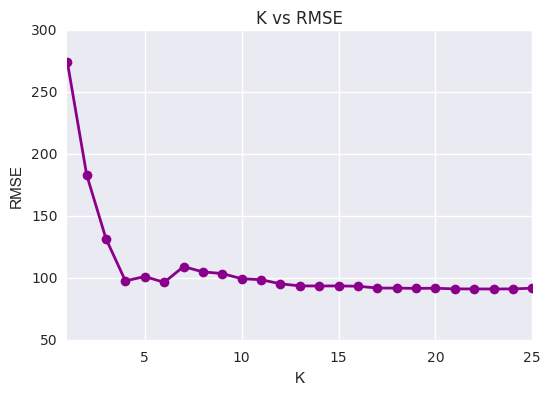

In [315]:
# plotting K value vs total rmse
RMSE_K_DF['RMSE'].plot(color="#8B008B", linewidth=2, marker='o')

#Adding labels
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('K vs RMSE')

In [316]:
RMSE_K_DF.RMSE.min()

91.400381217340552

#### Analysis:
1. The RMSE values increase from K=1 and reaches the max at K=4. From then on, it decreases.
2. The RMSE value reaches a low point at K=10 after which it stabalizes, only with a exception at K=14 where it seems to
   increase slightly. 
3. K=10 should be a good K value as after this, the RMSE value is more or less the same.